Задание 3.
Загрузите данные по изменению температуры поверхности земли. Для этого может понадобится зарегистрироваться на Kaggle. Затем нужно будет работать с данными, которые содержатся в файле GlobalLandTemperaturesByMajorCity.csv

In [36]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


df = pd.read_csv("C:\\Users\\UserOfPC\\Downloads\\brunoyam-ds-SC381-2952-main\\brunoyam-ds-SC381-2952-main\\data\\GlobalLandTemperaturesByMajorCity.csv")

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W





#Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый DataFrame, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.

In [10]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [19]:
df['dt'] = pd.to_datetime(df['dt'])
df.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [22]:
df_weather = df[df['dt'] >= '1950-01-01']
df_weather

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

In [69]:
df_weather_toronto = df_weather[df_weather['City'] == 'Toronto']
#сгруппировать по году и подсчет средней температуры
df_weather_toronto = df_weather_toronto.groupby(df_weather_toronto.dt.dt.year)['AverageTemperature'].mean()

Text(0, 0.5, 'Среднегодовая температура')

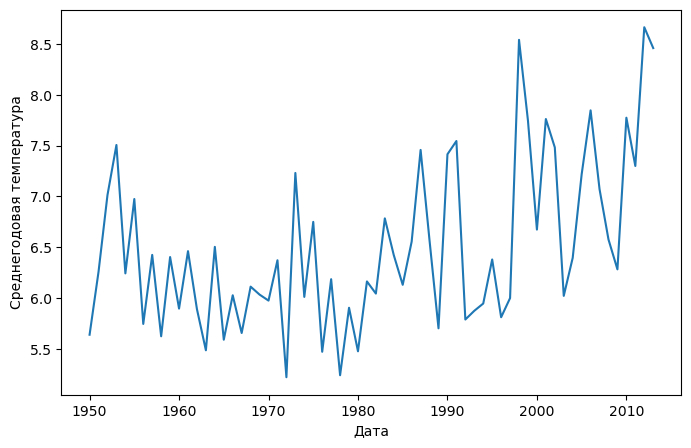

In [70]:
ax = df_weather_toronto.plot(x="dt",y="AverageTemperature")
ax.set_xlabel("Дата")
ax.set_ylabel("Среднегодовая температура")